<a href="https://colab.research.google.com/github/evanlin917/handwrittenDigits-Multi-LayerPerceptron/blob/main/handwrittenDigits_Multi_LayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(360, 64) (360,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


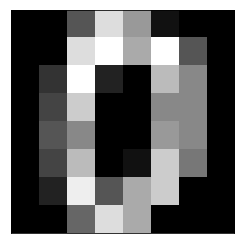

<Figure size 432x288 with 0 Axes>

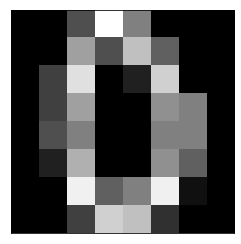

[0]


<Figure size 432x288 with 0 Axes>

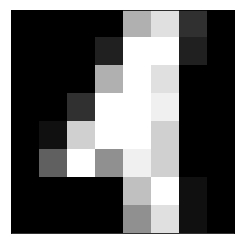

[1]
1.0
0.96


<Figure size 432x288 with 0 Axes>

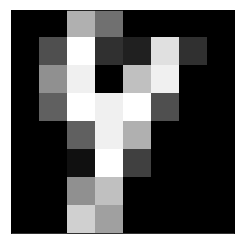

true value:  4
predicted value:  9
(70000, 784) (70000,)
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 784, dtype: float64 pixel1       0.0
pixel2       0.0
pixel3       0.0
pixel4       0.0
pixel5       0.0
            ... 
pixel780    62.0
pixel781     0.0
pixel782     0.0
pixel783     0.0
pixel784     0.0
Length: 784, dtype: float64
0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
[array([[-0.01115556, -0.08262716,  0.00865576, -0.01127277, -0.01387924,
        -0.02957125],
       [-0.05147731,  0.02078795, -0.03491854, -0.04064009,  0.02111263,
         0.00507923],
       [-0.06368971,  0.00236655, -0.05499954,  0.04973157,  0.06169498,
        -0.00100447],
       ...,
       [ 0.03318767,  0.03072576,  0.04947705, -0.07695913, -0.02204118,
        -0.0029547

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

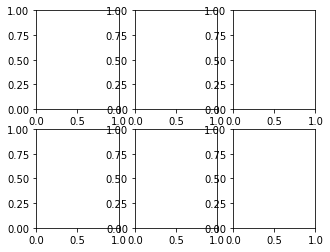

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

#loading the MNIST database of handwritten digits directly from scikit-learn
from sklearn.datasets import load_digits

#defining the feature matrix and the target array
x, y = load_digits(n_class = 2, return_X_y = True)

#finding the dimensions of the feature matrix and the target array
print(x.shape, y.shape)
print(x[0])
print(y[0])
print(x[0].reshape(8, 8))

#drawing the image of the data in the data set imported
plt.matshow(x[0].reshape(8, 8), cmap = plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
plt.savefig("digit.png")

#splitting the data set into a training and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2)

#creating/training the neural network model in particular, the multi-layer perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

#testing the MLP model against the first data point of the test data set
x_test_one = x_test[0]
plt.matshow(x_test_one.reshape(8, 8), cmap = plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
plt.savefig("first_test_digit.png")
print(mlp.predict([x_test_one]))

#testing the MLP model against the second data point of the test data set
x_test_two = x_test[1]
plt.matshow(x_test_two.reshape(8, 8), cmap = plt.cm. gray)
plt.xticks(())
plt.yticks(())
plt.show()
plt.savefig("second_test_digit.png")
print(mlp.predict([x_test_two]))

#seeing the model's accuracy for the whole test data set
print(mlp.score(x_test, y_test))

#creating a new MLP model to distinguish all 10 single digits from the data set
new_x, new_y = load_digits(return_X_y = True)
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, random_state = 2)
new_mlp = MLPClassifier(random_state = 2)
new_mlp.fit(new_x_train, new_y_train)

#finding the accuracy of the newly created MLP model
print(new_mlp.score(new_x_test, new_y_test))

#using a numpy mask to pull out the data points in the test data set that the newly created MLP model predicted as incorrect
new_y_pred = new_mlp.predict(new_x_test)
incorrect = new_x_test[new_y_pred != new_y_test]
incorrect_true = new_y_test[new_y_pred != new_y_test]
incorrect_pred = new_y_pred[new_y_pred != new_y_test]

#analyzing the first image predicted incorrectly
j = 0
plt.matshow(incorrect[j].reshape(8, 8), cmap = plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
plt.savefig("first_digit_predicted_incorrect.png")
print("true value: ", incorrect_true[j])
print("predicted value: ", incorrect_pred[j])

#import digit data set from the OpenML database
from sklearn.datasets import fetch_openml

#defining the feature matrix and the target array for the Open data set
open_x, open_y = fetch_openml('mnist_784', version = 1, return_X_y = True)

#looking at the dimensions of the newly made feature matrix and target array
print(open_x.shape, open_y.shape)
print(np.min(open_x), np.max(open_x))
print(open_y[0 : 5])

#creating a MLP model to work upon the Open data set
open_mlp = MLPClassifier(hidden_layer_sizes = (6, ), max_iter = 200, alpha = 1e-4, solver = 'sgd', random_state = 2)
open_mlp.fit(open_x, open_y)

#looking at the open_MLP coefficients
print(open_mlp.coefs_)
print(len(open_mlp.coefs_))
print(open_mlp.coefs_[0].shape)

#visualizing the hidden layers of the Open MLP model
fig, axes = plt.subplots(2, 3, figsize = (5, 4))
for i, ax in enumerate(axes.ravel()):
  coef = open_mlp.coef_[0][:, i]
  ax.matshow(coef.reshape(28, 28), cmap = plt.cm.gray)
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(i + 1)
plt.show()
plt.savefig("openMLP_hidden_layers.png")